# Bayesian Algorithm for Indoor Localization

In [1]:
# Let's first inspect the contents of the file to understand its structure
import pandas as pd

# Load the dataset from the file
file_path = r'C:\Users\Hp\OneDrive\Minor Project\archive (1)\TrainingData.csv'
dataset = pd.read_csv(file_path)

# Show the first few rows of the dataset to understand its structure
dataset.head(), dataset.columns


(   WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
 0     100     100     100     100     100     100     100     100     100   
 1     100     100     100     100     100     100     100     100     100   
 2     100     100     100     100     100     100     100     -97     100   
 3     100     100     100     100     100     100     100     100     100   
 4     100     100     100     100     100     100     100     100     100   
 
    WAP010  ...  WAP520  LONGITUDE      LATITUDE  FLOOR  BUILDINGID  SPACEID  \
 0     100  ...     100 -7541.2643  4.864921e+06      2           1      106   
 1     100  ...     100 -7536.6212  4.864934e+06      2           1      106   
 2     100  ...     100 -7519.1524  4.864950e+06      2           1      103   
 3     100  ...     100 -7524.5704  4.864934e+06      2           1      102   
 4     100  ...     100 -7632.1436  4.864982e+06      0           0      122   
 
    RELATIVEPOSITION  USERID  PHONEID   TIMESTAM

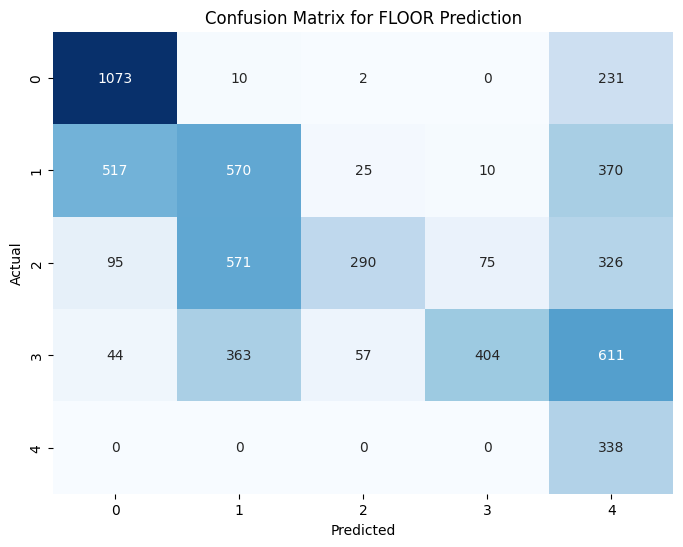

(0.4471748579070545,
 0.5557647160340267,
 0.4269937365938524,
 0.5368502644863364)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define feature columns (WAP data) and target columns (FLOOR, BUILDINGID)
X = dataset.iloc[:, :520]  # WAP columns
y_floor = dataset['FLOOR']  # Target: FLOOR classification
y_building = dataset['BUILDINGID']  # Target: BUILDING classification

# Split data into training and testing sets
X_train, X_test, y_train_floor, y_test_floor, y_train_building, y_test_building = train_test_split(
    X, y_floor, y_building, test_size=0.3, random_state=42)

# Initialize the Bayes model
bayes_model_floor = GaussianNB()
bayes_model_building = GaussianNB()

# Train the model on FLOOR classification
bayes_model_floor.fit(X_train, y_train_floor)

# Predict the test set for FLOOR
y_pred_floor = bayes_model_floor.predict(X_test)

# Train the model on BUILDING classification
bayes_model_building.fit(X_train, y_train_building)

# Predict the test set for BUILDING
y_pred_building = bayes_model_building.predict(X_test)

# Calculate the performance metrics for FLOOR prediction
accuracy_floor = accuracy_score(y_test_floor, y_pred_floor)
precision_floor = precision_score(y_test_floor, y_pred_floor, average='macro')
f1_floor = f1_score(y_test_floor, y_pred_floor, average='macro')
recall_floor = recall_score(y_test_floor, y_pred_floor, average='macro')

# Confusion Matrix for FLOOR classification
conf_matrix_floor = confusion_matrix(y_test_floor, y_pred_floor)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_floor, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix for FLOOR Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display performance metrics
accuracy_floor, precision_floor, f1_floor, recall_floor


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Scale the data (WAP features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data
X_train_scaled, X_test_scaled, y_train_floor, y_test_floor = train_test_split(
    X_scaled, y_floor, test_size=0.3, random_state=42)

# Initialize and train a Random Forest model
rf_model_floor = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_floor.fit(X_train_scaled, y_train_floor)

# Predict the test set for FLOOR
y_pred_floor_rf = rf_model_floor.predict(X_test_scaled)

# Calculate the performance metrics for FLOOR prediction using Random Forest
accuracy_floor_rf = accuracy_score(y_test_floor, y_pred_floor_rf)
precision_floor_rf = precision_score(y_test_floor, y_pred_floor_rf, average='macro')
f1_floor_rf = f1_score(y_test_floor, y_pred_floor_rf, average='macro')
recall_floor_rf = recall_score(y_test_floor, y_pred_floor_rf, average='macro')

# Perform cross-validation for more robust evaluation
cv_scores = cross_val_score(rf_model_floor, X_scaled, y_floor, cv=5, scoring='accuracy')

# Display performance metrics and cross-validation scores
accuracy_floor_rf, precision_floor_rf, f1_floor_rf, recall_floor_rf, cv_scores.mean()

import pandas as pd

# Create a table with the performance metrics
performance_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'F1 Score', 'Recall', 'Cross-Validation Accuracy'],
    'Value': [accuracy_floor_rf, precision_floor_rf, f1_floor_rf, recall_floor_rf, cv_scores.mean()]
})

performance_table



,Metric,Value
0,Accuracy,0.993480
1,Precision,0.994413
2,F1 Score,0.993783
3,Recall,0.993180
4,Cross-Validation Accuracy,0.819890
